In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
from sklearn.preprocessing import RobustScaler

In [2]:
rides = pd.read_csv("../big_query_24.csv")
rides.rename(columns={'id': 'ride_id'}, inplace=True)
rides.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city
count,2.426000e+04,2.426000e+04,24260.000000,24260.000000,24260.000000,24260.000000,24260.000000,24260.000000,2.426000e+04,24260.0
mean,2.010495e+06,2.376807e+07,35.693980,51.401119,35.694668,51.397562,1003.226051,1236.469992,4.956898e+09,1.0
std,1.440427e+06,1.800928e+07,0.096191,0.143753,0.095899,0.152071,725.298062,1034.221594,3.405802e+05,0.0
min,1.010000e+02,1.375000e+03,35.249897,50.903470,34.636840,50.016300,24.000000,120.000000,4.956287e+09,1.0
25%,5.573940e+05,5.043194e+06,35.663319,51.331473,35.661003,51.330028,464.000000,504.000000,4.956594e+09,1.0
50%,1.992264e+06,2.400925e+07,35.723982,51.404408,35.723633,51.401817,799.000000,905.000000,4.956982e+09,1.0
75%,3.323714e+06,3.831664e+07,35.755246,51.465694,35.754699,51.470322,1347.000000,1650.000000,4.957167e+09,1.0
max,4.346548e+06,5.750996e+07,35.839420,52.794230,36.259760,52.792877,7794.000000,9088.000000,4.957626e+09,1.0


In [3]:
columns = ['ride_id','driver_id','a_t_a_result.arrival_a_t_a','a_t_a_result.boarding_a_t_a','a_t_a_result.ride_a_t_a','a_t_a_result.arrival_probe_result.probe.point.lat','a_t_a_result.arrival_probe_result.probe.point.lon','a_t_a_result.arrival_probe_result.probe.timestamp','a_t_a_result.arrival_probe_result.confidence','a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level','a_t_a_result.boarding_probe_result.probe.point.lat','a_t_a_result.boarding_probe_result.probe.point.lon','a_t_a_result.boarding_probe_result.probe.timestamp','a_t_a_result.boarding_probe_result.confidence','a_t_a_result.boarding_probe_result.h3_index','a_t_a_result.boarding_probe_result.k_ring_level','a_t_a_result.final_destination_probe_result.probe.point.lat','a_t_a_result.final_destination_probe_result.probe.point.lon','a_t_a_result.final_destination_probe_result.probe.timestamp','a_t_a_result.final_destination_probe_result.confidence','a_t_a_result.final_destination_probe_result.h3_index','a_t_a_result.final_destination_probe_result.k_ring_level','a_t_a_result.destination_probe_result.probe.point.lat','a_t_a_result.destination_probe_result.probe.point.lon','a_t_a_result.destination_probe_result.probe.timestamp','a_t_a_result.destination_probe_result.confidence','a_t_a_result.destination_probe_result.h3_index','a_t_a_result.destination_probe_result.k_ring_level','a_t_a_result.extra_destination_probe_result.probe.point.lat','a_t_a_result.extra_destination_probe_result.probe.point.lon','a_t_a_result.extra_destination_probe_result.probe.timestamp','a_t_a_result.extra_destination_probe_result.confidence','a_t_a_result.extra_destination_probe_result.h3_index','a_t_a_result.extra_destination_probe_result.k_ring_level','pickup_a_d_d_result.distance','pickup_a_d_d_result.confidence','pickup_a_d_d_result.route_ratio','pickup_a_d_d_result.g_p_s_ratio','ride_a_d_d_result.distance','ride_a_d_d_result.confidence','ride_a_d_d_result.route_ratio','ride_a_d_d_result.g_p_s_ratio','total_a_d_d_confidence','in_ride_allotment','e_d_d','clickhouse_time','hash']
khatkesh = pd.read_csv("../khatkesh.csv", names=columns)
khatkesh.describe()

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.k_ring_level,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,5.028590e+05,5.028590e+05,502859.000000,5.028590e+05,5.028590e+05,502859.000000,502859.000000,5.028590e+05,502859.000000,502859.000000,...,502859.000000,502859.000000,502859.000000,502859.000000,502859.000000,502859.000000,502859.000000,502859.000000,502859.000000,5.028590e+05
mean,4.956607e+09,2.379701e+06,186.070441,2.013937e+16,7.155686e+07,34.603114,51.913875,2.457812e+15,0.734051,1.158275,...,0.000326,0.015392,13.564964,0.857177,0.000125,0.707576,0.867706,0.046938,8.377787,9.240882e+18
std,4.392595e+05,1.344870e+06,146.035298,6.091805e+17,2.135430e+09,2.544448,3.538870,2.129146e+17,0.341657,1.439362,...,0.015817,0.017221,17.250296,0.189048,0.005345,0.344261,0.178898,0.332769,12.547627,5.326126e+18
min,4.873587e+09,1.000000e+00,0.000000,0.000000e+00,1.000000e+00,25.277332,44.829102,1.662865e+09,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.062941e+13
25%,4.956373e+09,1.199125e+06,91.000000,8.000000e+00,4.020000e+02,32.695423,50.836760,1.663160e+09,0.591716,0.000000,...,0.000000,0.005714,4.603000,0.750032,0.000000,0.482860,0.792329,0.000000,2.784000,4.635700e+18
50%,4.956612e+09,2.438832e+06,170.000000,3.600000e+01,6.840000e+02,35.707092,51.409603,1.663161e+09,0.769231,1.000000,...,0.000000,0.011905,8.623000,0.957293,0.000000,0.884615,0.957387,0.000000,5.180000,9.246887e+18
75%,4.956863e+09,3.616538e+06,258.000000,1.240000e+02,1.172000e+03,36.264671,52.524117,1.663163e+09,1.000000,2.000000,...,0.000000,0.020833,16.327728,1.000000,0.000000,0.975610,1.000000,0.000000,9.833000,1.385216e+19
max,4.957263e+09,4.346386e+06,7954.000000,1.844674e+19,6.379876e+10,39.661167,61.168961,1.844674e+19,1.000000,4.000000,...,1.000000,1.000000,1784.723999,1.000000,1.000000,1.000000,1.000000,34.022999,1741.516968,1.844670e+19


In [4]:
rides_khatkesh = pd.merge(rides, khatkesh, on="ride_id")
rides_khatkesh.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.506300e+04,1.506300e+04,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,1.506300e+04,15063.0,...,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,1.506300e+04
mean,1.981823e+06,2.391234e+07,35.693123,51.402332,35.694000,51.399399,867.554870,1088.631083,4.956710e+09,1.0,...,0.000208,0.014827,13.534466,0.876051,0.000115,0.738491,0.883905,0.015693,8.121885,9.220426e+18
std,1.436073e+06,1.795970e+07,0.097267,0.146990,0.097062,0.152614,633.272365,951.193802,2.752267e+05,0.0,...,0.011839,0.015742,14.004605,0.174419,0.002896,0.321243,0.164876,0.146355,8.625966,5.339763e+18
min,1.010000e+02,1.375000e+03,35.249897,50.903470,34.641853,50.535954,24.000000,120.000000,4.956287e+09,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232000,3.680090e+14
25%,5.346035e+05,5.211465e+06,35.662340,51.330618,35.660725,51.330080,410.000000,436.000000,4.956454e+09,1.0,...,0.000000,0.005319,4.448000,0.813760,0.000000,0.582005,0.835089,0.000000,2.646000,4.576592e+18
50%,1.940900e+06,2.427381e+07,35.724340,51.404480,35.724358,51.402800,689.000000,775.000000,4.956690e+09,1.0,...,0.000000,0.011236,8.968000,0.965429,0.000000,0.900990,0.963664,0.000000,5.365000,9.171676e+18
75%,3.289352e+06,3.849748e+07,35.754384,51.468884,35.754307,51.472001,1138.000000,1392.000000,4.956964e+09,1.0,...,0.000000,0.020000,17.646500,1.000000,0.000000,0.974576,1.000000,0.000000,10.529500,1.387260e+19
max,4.346206e+06,5.750970e+07,35.832066,52.781403,36.048410,52.792877,5231.000000,6709.000000,4.957246e+09,1.0,...,1.000000,0.500000,159.207718,1.000000,0.204274,1.000000,1.000000,4.430000,116.138000,1.844592e+19


In [5]:
rides = rides_khatkesh[(rides_khatkesh['eta'] > 180) &
                       (rides_khatkesh['eta'] < 10800) &
                       (rides_khatkesh['a_t_a_result.ride_a_t_a'] > 180) &
                       (rides_khatkesh['a_t_a_result.ride_a_t_a'] < 10800)]
rides.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.431400e+04,1.431400e+04,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,1.431400e+04,14314.0,...,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,14314.000000,1.431400e+04
mean,1.980299e+06,2.372658e+07,35.694601,51.400947,35.695543,51.397840,902.663337,1132.744516,4.956706e+09,1.0,...,0.000074,0.013369,14.138394,0.878035,0.000087,0.740149,0.886102,0.015762,8.475427,9.206828e+18
std,1.437208e+06,1.795372e+07,0.095782,0.142208,0.095551,0.148314,628.103121,952.000888,2.738054e+05,0.0,...,0.002724,0.010659,14.102775,0.168137,0.001919,0.319382,0.158786,0.147553,8.689244,5.339666e+18
min,1.010000e+02,1.375000e+03,35.249897,50.903470,34.641853,50.535954,181.000000,120.000000,4.956287e+09,1.0,...,0.000000,0.000000,0.194000,0.015032,0.000000,0.000000,0.062460,0.000000,0.598000,3.680090e+14
25%,5.314055e+05,5.056045e+06,35.664489,51.331163,35.663728,51.330590,444.000000,476.000000,4.956451e+09,1.0,...,0.000000,0.005348,4.956000,0.817145,0.000000,0.589102,0.836708,0.000000,2.954000,4.553286e+18
50%,1.935360e+06,2.401134e+07,35.724758,51.404336,35.724820,51.402598,719.000000,810.500000,4.956685e+09,1.0,...,0.000000,0.010870,9.593000,0.963780,0.000000,0.901639,0.963172,0.000000,5.729500,9.150920e+18
75%,3.291454e+06,3.825565e+07,35.754653,51.466925,35.754650,51.470549,1170.000000,1443.000000,4.956957e+09,1.0,...,0.000000,0.018868,18.395999,1.000000,0.000000,0.973684,1.000000,0.000000,10.868250,1.386922e+19
max,4.346206e+06,5.750927e+07,35.828438,52.773940,36.048410,52.792877,5231.000000,6709.000000,4.957224e+09,1.0,...,0.156830,0.052632,159.207718,1.000000,0.075890,1.000000,1.000000,4.430000,116.138000,1.844592e+19


In [6]:
rides = rides[rides['ride_a_d_d_result.confidence'] > 0.6]
rides.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.243500e+04,1.243500e+04,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,1.243500e+04,12435.0,...,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,12435.000000,1.243500e+04
mean,1.984667e+06,2.368107e+07,35.694305,51.400390,35.695317,51.397322,896.198633,1122.913470,4.956707e+09,1.0,...,0.000079,0.014224,14.802611,0.932249,0.000045,0.827725,0.936971,0.017408,8.390454,9.226360e+18
std,1.440237e+06,1.796537e+07,0.095661,0.143475,0.095143,0.149095,622.199853,942.565978,2.737140e+05,0.0,...,0.002849,0.010544,14.496755,0.099332,0.001173,0.221447,0.089059,0.155708,8.574203,5.348107e+18
min,1.010000e+02,1.375000e+03,35.249897,50.903470,34.641853,50.535954,181.000000,120.000000,4.956287e+09,1.0,...,0.000000,0.000000,0.194000,0.600579,0.000000,0.016854,0.540521,0.000000,0.598000,3.680090e+14
25%,5.351490e+05,5.018804e+06,35.664346,51.330320,35.663137,51.329190,443.500000,475.000000,4.956454e+09,1.0,...,0.000000,0.006211,5.310000,0.907555,0.000000,0.766667,0.906503,0.000000,2.951500,4.552304e+18
50%,1.938937e+06,2.397690e+07,35.724570,51.403110,35.724545,51.401720,714.000000,804.000000,4.956685e+09,1.0,...,0.000000,0.011628,10.170000,0.978110,0.000000,0.924528,0.976122,0.000000,5.682000,9.185595e+18
75%,3.300775e+06,3.826664e+07,35.754391,51.466616,35.754288,51.469811,1158.000000,1425.000000,4.956959e+09,1.0,...,0.000000,0.020000,19.242001,1.000000,0.000000,0.979167,1.000000,0.000000,10.783000,1.389922e+19
max,4.346206e+06,5.750927e+07,35.828438,52.773940,36.048410,52.792877,5231.000000,6596.000000,4.957224e+09,1.0,...,0.156830,0.052632,159.207718,1.000000,0.067175,1.000000,1.000000,4.430000,116.138000,1.844592e+19


In [7]:
rides = rides[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d']]
eta_edd = rides[["eta", "e_d_d"]].to_numpy().reshape(-1, 2)
ata = rides["a_t_a_result.ride_a_t_a"].to_numpy().reshape(-1, 1)

In [16]:
eta_edd_train, eta_edd_test, ata_train, ata_test = train_test_split(eta_edd, ata, test_size=0.05, random_state=73)
print(len(eta_edd_train))
print(len(eta_edd_test))

11813
622


array([[<AxesSubplot: title={'center': 'ATA'}>]], dtype=object)

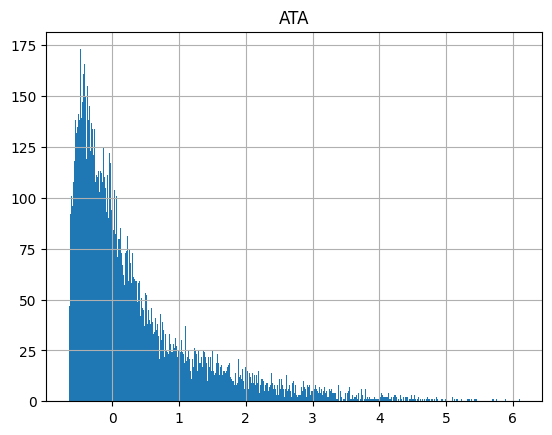

In [19]:
robust_ata_train = RobustScaler().fit(ata_train)
robust_ata_train_transformed = robust_ata_train.transform(ata_train)

robust_ata_df = pd.DataFrame(robust_ata_train_transformed, columns = ['ATA'])
robust_ata_df.hist(bins=500)

In [21]:
robust_eta_edd_train = RobustScaler().fit(eta_edd_train)
robust_eta_edd_train_transformed = robust_eta_edd_train.transform(eta_edd_train)

array([[<AxesSubplot: title={'center': 'ETA'}>]], dtype=object)

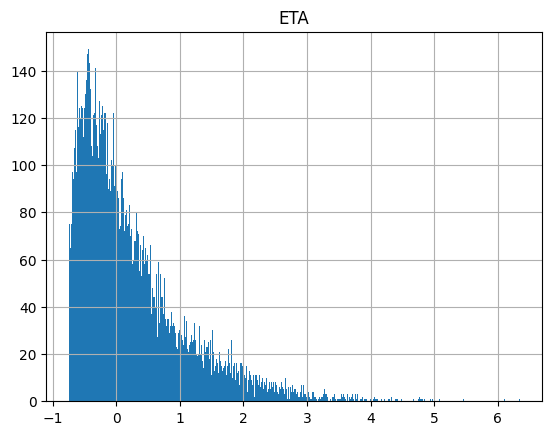

In [22]:
robust_eta_train_transformed = robust_eta_edd_train_transformed[:, 0].reshape(-1, 1)

robust_eta_df = pd.DataFrame(robust_eta_train_transformed, columns=['ETA'])
robust_eta_df.hist(bins=500)

array([[<AxesSubplot: title={'center': 'EDD'}>]], dtype=object)

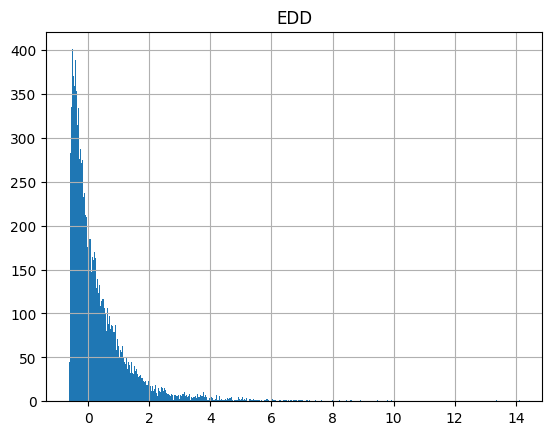

In [25]:
robust_edd_train = robust_eta_edd_train_transformed[:, 1].reshape(-1, 1)

robust_edd_df = pd.DataFrame(robust_edd_train, columns=['EDD'])
robust_edd_df.hist(bins=500)

In [26]:
reg = LinearRegression().fit(robust_eta_edd_train_transformed, robust_ata_train_transformed)

In [27]:
print(reg.coef_)
print(reg.intercept_)

[[ 1.16668941 -0.11259277]]
[0.07878083]


In [28]:
robust_ata_test_transformed = robust_ata_train.transform(ata_test)
robust_eta_edd_test_transformed = robust_eta_edd_train.transform(eta_edd_test)

In [32]:
ata_train_pred = reg.predict(robust_eta_edd_train_transformed)
ata_test_pred = reg.predict(robust_eta_edd_test_transformed)

In [34]:
print("ETA train MAE", mean_absolute_error(robust_ata_train_transformed, robust_eta_edd_train_transformed[:, 0]))
print("prediction train MAE", mean_absolute_error(robust_ata_train_transformed, ata_train_pred))

print("ETA test MAE ", mean_absolute_error(robust_ata_test_transformed, robust_eta_edd_test_transformed[:, 0]))
print("prediction test MAE", mean_absolute_error(robust_ata_test_transformed, ata_test_pred))

print("ETA train MSE", mean_squared_error(robust_ata_train_transformed, robust_eta_edd_train_transformed[:, 0]))
print("prediction train MSE", mean_squared_error(robust_ata_train_transformed, ata_train_pred))

print("ETA test MSE ", mean_squared_error(robust_ata_test_transformed, robust_eta_edd_test_transformed[:, 0]))
print("prediction test MSE", mean_squared_error(robust_ata_test_transformed, ata_test_pred))

print("ETA train explained_variance_score", explained_variance_score(robust_ata_train_transformed, robust_eta_edd_train_transformed[:, 0]))
print("prediction train explained_variance_score", explained_variance_score(robust_ata_train_transformed, ata_train_pred))

print("ETA test explained_variance_score ", explained_variance_score(robust_ata_test_transformed, robust_eta_edd_test_transformed[:, 0]))
print("prediction test explained_variance_score", explained_variance_score(robust_ata_test_transformed, ata_test_pred))

print("ETA train median_absolute_error", median_absolute_error(robust_ata_train_transformed, robust_eta_edd_train_transformed[:, 0]))
print("prediction train median_absolute_error", median_absolute_error(robust_ata_train_transformed, ata_train_pred))

print("ETA test median_absolute_error ", median_absolute_error(robust_ata_test_transformed, robust_eta_edd_test_transformed[:, 0]))
print("prediction test median_absolute_error", median_absolute_error(robust_ata_test_transformed, ata_test_pred))

print("ETA train r2_score", r2_score(robust_ata_train_transformed, robust_eta_edd_train_transformed[:, 0]))
print("prediction train r2_score", r2_score(robust_ata_train_transformed, ata_train_pred))

print("ETA test r2_score ", r2_score(robust_ata_test_transformed, robust_eta_edd_test_transformed[:, 0]))
print("prediction test r2_score", r2_score(robust_ata_test_transformed, ata_test_pred))

print("ETA train MAPE", mean_absolute_percentage_error(robust_ata_train_transformed, robust_eta_edd_train_transformed[:, 0]))
print("prediction train MAPE", mean_absolute_percentage_error(robust_ata_train_transformed, ata_train_pred))

print("ETA test MAPE ", mean_absolute_percentage_error(robust_ata_test_transformed, robust_eta_edd_test_transformed[:, 0]))
print("prediction test MAPE", mean_absolute_percentage_error(robust_ata_test_transformed, ata_test_pred))

ETA train MAE 0.24390348845874685
prediction train MAE 0.24642211666657188
ETA test MAE  0.24843350928446434
prediction test MAE 0.24749971373387508
ETA train MSE 0.163659445051295
prediction train MSE 0.15298372656370665
ETA test MSE  0.16199116433726005
prediction test MSE 0.14543350235407954
ETA train explained_variance_score 0.8399960915740659
prediction train explained_variance_score 0.8439577081318685
ETA test explained_variance_score  0.8448089833954948
prediction test explained_variance_score 0.8534707297310548
ETA train median_absolute_error 0.14009794383208946
prediction train median_absolute_error 0.15304275155668473
ETA test median_absolute_error  0.14879780026814426
prediction test median_absolute_error 0.1583927515140432
ETA train r2_score 0.833068552680105
prediction train r2_score 0.8439577081318685
ETA test r2_score  0.8367466613407607
prediction test r2_score 0.8534333344084203
ETA train MAPE 731425801487.9896
prediction train MAPE 916383180068.7148
ETA test MAPE  1.1

In [36]:
robust_ata_train_transformed

array([[ 1.36008448],
       [ 1.3030623 ],
       [ 1.03695882],
       ...,
       [-0.11193242],
       [ 1.21752904],
       [-0.24920803]])

In [37]:
ata_train_pred

array([[ 1.68565038],
       [ 1.44604529],
       [ 1.58587153],
       ...,
       [ 0.06955126],
       [ 0.7071572 ],
       [-0.26235082]])

In [59]:
a = abs(ata_train_pred) < 0.0001

In [62]:
a = (robust_ata_train_transformed - ata_train_pred) / robust_ata_train_transformed

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_2179/2769143560.py:1: RuntimeWarning: divide by zero encountered in divide
  a = (robust_ata_train_transformed - ata_train_pred) / robust_ata_train_transformed


In [65]:
a.max()

264.4796629060691

In [64]:
b

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])